In [1]:
import os
print('Working Directory: {}'.format(os.getcwd()))

Working Directory: C:\Users\SUJITH KUMAR\Downloads\Insurance-master


## Data Import 

In [2]:
import pandas as pd
import numpy as np

data = pd.ExcelFile('Data-All.xlsx')
print(data.sheet_names)
df1 = data.parse('Sheet1')
#df1.info()

['Sheet1']


In [3]:
print('Shape of Data: {}'.format(df1.shape))
print('Dimentions of data:',df1.ndim)
print('Data Index:',df1.index)

Shape of Data: (39781, 34)
Dimentions of data: 2
Data Index: RangeIndex(start=0, stop=39781, step=1)


In [4]:
# Replace the spaces in clumn names to underscore and convert column headers to lower case

df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.lower()

# df1.columns = [x.lower() for x in df1.columns]

In [5]:
df1.shape

(39781, 34)

In [6]:
# Filtering the correct age range
df1 = df1[df1.age_at_accident_date < 100.0]
df1 = df1[df1.age_at_accident_date > 0.0]
df1 = df1[df1.experience_years < 100.0]
df1 = df1[df1.experience_years > 0.0]
df1.shape

(39310, 34)

In [7]:
# Filtering the unidentified sex
df1 = df1[df1.sex != 'U']
df1.shape

(39261, 34)

## Data Engineering

In [220]:
df2 = df1

In [221]:
df2.market.value_counts()

GRAIN ELEVATORS                                      7343
RACE CAR OWNERS, RACING TEAMS                        3990
REFINED FUEL (inc. Cstores)                          3168
IMPLEMENT DEALER                                     2341
AG SUPPLY/FARM STORES                                2162
EGG LAYING AND PROCESSORS                            1967
FEEDMILLS FOR LIVESTOCK AND PET FOODS                1821
FOOD DISTRIBUTORS                                    1408
FERTILIZER BLENDING & DISTRIBUTION                   1272
OTHER                                                1120
FRUIT & VEG GROWER/SHIPPER/PACKER                     978
NURSERY/GREENHOUSE WHOLESALE                          966
MEAT PROCESSING (OTHER THAN POULTRY)                  841
ETHANOL                                               763
BOTTLERS/BEVERAGE DISTRIBUTORS                        609
FRUIT & VEGETABLE PROCESSING                          599
HOG CONFINEMENT                                       593
CATTLE FEEDLOT

In [222]:
df2.market.describe()

count               39261
unique                 49
top       GRAIN ELEVATORS
freq                 7343
Name: market, dtype: object

In [223]:
df2 = df2[df2.market != 'RACE CAR OWNERS, RACING TEAMS']
df2 = df2[df2.market != 'NURSERY/GREENHOUSE WHOLESALE']

In [224]:
df2.market.describe()

count               34305
unique                 47
top       GRAIN ELEVATORS
freq                 7343
Name: market, dtype: object

In [225]:
df2.market = df2.market.str.replace('CONSTRUCTION EQUIP DEALER', 'OTHERS')
df2.market = df2.market.str.replace('FARM LABOR CONTRACTORS', 'OTHERS')
df2.market = df2.market.str.replace('TIRE DEALERS', 'OTHERS')
df2.market = df2.market.str.replace('BROKERED SALES/COMMODITIES TRADING', 'OTHERS')
df2.market = df2.market.str.replace('PASTA MANUFACTURING', 'OTHERS')
df2.market = df2.market.str.replace('CUSTOM HARVESTING', 'OTHERS')
df2.market = df2.market.str.replace('OIL EXTRACTION - SOYBEAN/COTTONSEED', 'OTHERS')
df2.market = df2.market.str.replace('DAIRY FARMS', 'OTHERS')
df2.market = df2.market.str.replace('COTTON GIN/WAREHOUSE', 'OTHERS')
df2.market = df2.market.str.replace('OIL RECYCLING', 'OTHERS')
df2.market = df2.market.str.replace('CANDY MANUFACTURERS & DISTRIBUTORS', 'OTHERS')
df2.market = df2.market.str.replace('MILK HAULING ONLY', 'OTHERS')
df2.market = df2.market.str.replace('COMMERCIAL FARM/FRUIT & VEG GROWER', 'OTHERS')
df2.market = df2.market.str.replace('FISH GROWING/PROCESSING (inc. Frozen)', 'OTHERS')
df2.market = df2.market.str.replace('EQUIPMENT MANUFACTURING', 'OTHERS')
df2.market = df2.market.str.replace('BIO-DIESEL', 'OTHERS')

df2.market = df2.market.str.replace('TRUCKING ONLY', 'OTHERS')
df2.market = df2.market.str.replace('BAKERIES, COMMERCIAL AND RETAIL', 'OTHERS')
df2.market = df2.market.str.replace('MUSHROOM SERVICES', 'OTHERS')
df2.market = df2.market.str.replace('NUTS & LEGUMES FOR HUMAN CONSUMPTION', 'OTHERS')
df2.market = df2.market.str.replace('FROZEN SPECIALTY FOOD MANUFACTURING', 'OTHERS')
df2.market = df2.market.str.replace('LPG', 'OTHERS')
df2.market = df2.market.str.replace('NURSERY/GREENHOUSE RETAIL', 'OTHERS')
df2.market = df2.market.str.replace('FISH GROWING/PROCESSING (inc. Frozen)', 'OTHERS')

In [226]:
df2.market.value_counts()

GRAIN ELEVATORS                                      7343
REFINED FUEL (inc. Cstores)                          3168
OTHERS                                               2879
IMPLEMENT DEALER                                     2341
AG SUPPLY/FARM STORES                                2162
EGG LAYING AND PROCESSORS                            1967
FEEDMILLS FOR LIVESTOCK AND PET FOODS                1821
FOOD DISTRIBUTORS                                    1408
FERTILIZER BLENDING & DISTRIBUTION                   1272
OTHER                                                1120
FRUIT & VEG GROWER/SHIPPER/PACKER                     978
MEAT PROCESSING (OTHER THAN POULTRY)                  841
ETHANOL                                               763
BOTTLERS/BEVERAGE DISTRIBUTORS                        609
FRUIT & VEGETABLE PROCESSING                          599
HOG CONFINEMENT                                       593
CATTLE FEEDLOTS                                       588
AG CHEMICAL DI

In [227]:
df2.market.describe()

count               34305
unique                 26
top       GRAIN ELEVATORS
freq                 7343
Name: market, dtype: object

In [228]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34305 entries, 6 to 39780
Data columns (total 34 columns):
claim                               34305 non-null int64
effective_year                      34305 non-null int64
account                             34305 non-null int64
market                              34305 non-null object
sex                                 34305 non-null object
jurisdiction_state                  34304 non-null object
accident_state                      34305 non-null object
classcode                           34305 non-null object
class_desription                    34180 non-null object
occupation                          34305 non-null object
date_of_birth                       34305 non-null datetime64[ns]
date_of_hire                        34305 non-null datetime64[ns]
accident_date                       34305 non-null datetime64[ns]
experience_years                    34305 non-null float64
age_at_accident_date                34305 non-null float6

## Feature Selection

In [229]:
df3 = df2
df3.shape

(34305, 34)

In [230]:
# Features to be removed from the data
print('Removing features...')
print(df3.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]])
df3.drop(df3.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]], axis=1, inplace=True)

Removing features...
Index(['claim', 'effective_year', 'account', 'jurisdiction_state',
       'class_desription', 'date_of_birth', 'date_of_hire', 'accident_date',
       'date_reported_to_employer', 'report_date', 'date_of_disability',
       'date_returened_to_work', 'claim_description', 'claim_status',
       'type_of_injury_code', 'body_part', 'cause_of_injury',
       'nature_of_injury_group', 'total_incurred_amount', 'indemnity',
       'medical', 'expenses', 'sum_(medical-indemnity-expenses)'],
      dtype='object')


In [231]:
df3 = df3.drop('nature_of_injury', 1)
df3 = df3.drop('body_part_group', 1)
df3 = df3.drop('type_of_injury', 1)
df3 = df3.drop('accident_state', 1)

In [232]:
df3.shape

(34305, 7)

In [233]:
# Number of unique rows in all the columns
for col in df3.columns:
    print(col, df3[col].nunique())


market 26
sex 2
classcode 211
occupation 6879
experience_years 3240
age_at_accident_date 5514
case_of_injury_group 11


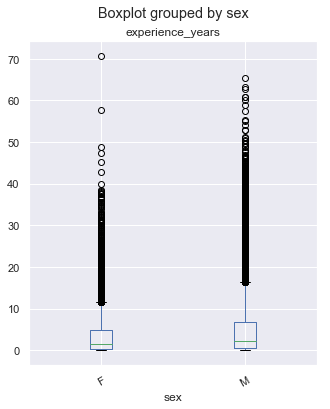

In [234]:
df3.boxplot('experience_years', 'sex', rot=30, figsize=(5, 6))

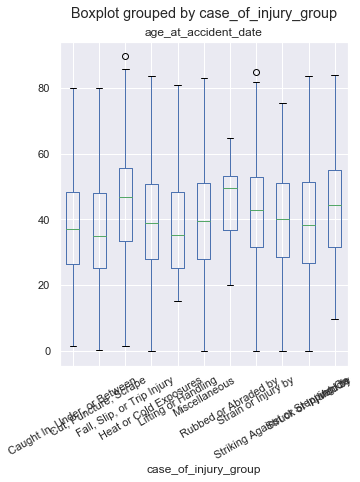

In [235]:
df3.boxplot('age_at_accident_date', 'case_of_injury_group', rot=30, figsize=(5, 6))

In [236]:
df3.loc[(df3['experience_years'] >= 0.0) & (df3['experience_years'] <= 10.0), 'experience_years'] = 1
df3.loc[(df3['experience_years'] > 10.0) & (df3['experience_years'] <= 20.0), 'experience_years'] = 2
df3.loc[(df3['experience_years'] > 20.0) & (df3['experience_years'] <= 30.0), 'experience_years'] = 3
df3.loc[(df3['experience_years'] > 30.0) & (df3['experience_years'] <= 40.0), 'experience_years'] = 4
df3.loc[(df3['experience_years'] > 40.0) & (df3['experience_years'] <= 50.0), 'experience_years'] = 5
df3.loc[(df3['experience_years'] > 50.0) & (df3['experience_years'] <= 60.0), 'experience_years'] = 6
df3.loc[(df3['experience_years'] > 60.0) & (df3['experience_years'] <= 70.0), 'experience_years'] = 7
df3.loc[(df3['experience_years'] > 70.0) & (df3['experience_years'] <= 100.0), 'experience_years'] = 8
df3

,market,sex,classcode,occupation,experience_years,age_at_accident_date,case_of_injury_group
6,GRAIN ELEVATORS,M,17,LABORER,1.0,26.71,Struck or Injured by
7,FRUIT & VEG GROWER/SHIPPER/PACKER,M,17,MACHINE OPERATOR,1.0,38.38,Struck or Injured by
8,FRUIT & VEG GROWER/SHIPPER/PACKER,F,17,PACKER,1.0,49.55,"Fall, Slip, or Trip Injury"
9,FRUIT & VEG GROWER/SHIPPER/PACKER,M,17,DRIVER,2.0,60.22,"Fall, Slip, or Trip Injury"
10,FRUIT & VEG GROWER/SHIPPER/PACKER,F,17,LABORER,1.0,50.39,Striking Against or Stepping On
11,EGG LAYING AND PROCESSORS,F,34,LAYER HOUSE PERSON,1.0,52.84,"Fall, Slip, or Trip Injury"
12,EGG LAYING AND PROCESSORS,F,34,EGG PACKER,1.0,36.05,"Fall, Slip, or Trip Injury"
13,EGG LAYING AND PROCESSORS,M,34,ENVIRONMENTAL SRV,1.0,25.46,Miscellaneous
14,EGG LAYING AND PROCESSORS,M,34,COMPOST CAT CREW,1.0,50.50,"Fall, Slip, or Trip Injury"
15,EGG LAYING AND PROCESSORS,M,34,PACKER CANDLER,1.0,36.12,"Fall, Slip, or Trip Injury"


In [237]:
df3.loc[(df3['age_at_accident_date'] >= 0.0) & (df3['age_at_accident_date'] <= 10.0), 'age_at_accident_date'] = 1
df3.loc[(df3['age_at_accident_date'] > 10.0) & (df3['age_at_accident_date'] <= 20.0), 'age_at_accident_date'] = 2
df3.loc[(df3['age_at_accident_date'] > 20.0) & (df3['age_at_accident_date'] <= 30.0), 'age_at_accident_date'] = 3
df3.loc[(df3['age_at_accident_date'] > 30.0) & (df3['age_at_accident_date'] <= 40.0), 'age_at_accident_date'] = 4
df3.loc[(df3['age_at_accident_date'] > 40.0) & (df3['age_at_accident_date'] <= 50.0), 'age_at_accident_date'] = 5
df3.loc[(df3['age_at_accident_date'] > 50.0) & (df3['age_at_accident_date'] <= 60.0), 'age_at_accident_date'] = 6
df3.loc[(df3['age_at_accident_date'] > 60.0) & (df3['age_at_accident_date'] <= 70.0), 'age_at_accident_date'] = 7
df3.loc[(df3['age_at_accident_date'] > 70.0) & (df3['age_at_accident_date'] <= 100.0), 'age_at_accident_date'] = 8
df3

,market,sex,classcode,occupation,experience_years,age_at_accident_date,case_of_injury_group
6,GRAIN ELEVATORS,M,17,LABORER,1.0,3.0,Struck or Injured by
7,FRUIT & VEG GROWER/SHIPPER/PACKER,M,17,MACHINE OPERATOR,1.0,4.0,Struck or Injured by
8,FRUIT & VEG GROWER/SHIPPER/PACKER,F,17,PACKER,1.0,5.0,"Fall, Slip, or Trip Injury"
9,FRUIT & VEG GROWER/SHIPPER/PACKER,M,17,DRIVER,2.0,7.0,"Fall, Slip, or Trip Injury"
10,FRUIT & VEG GROWER/SHIPPER/PACKER,F,17,LABORER,1.0,6.0,Striking Against or Stepping On
11,EGG LAYING AND PROCESSORS,F,34,LAYER HOUSE PERSON,1.0,6.0,"Fall, Slip, or Trip Injury"
12,EGG LAYING AND PROCESSORS,F,34,EGG PACKER,1.0,4.0,"Fall, Slip, or Trip Injury"
13,EGG LAYING AND PROCESSORS,M,34,ENVIRONMENTAL SRV,1.0,3.0,Miscellaneous
14,EGG LAYING AND PROCESSORS,M,34,COMPOST CAT CREW,1.0,6.0,"Fall, Slip, or Trip Injury"
15,EGG LAYING AND PROCESSORS,M,34,PACKER CANDLER,1.0,4.0,"Fall, Slip, or Trip Injury"


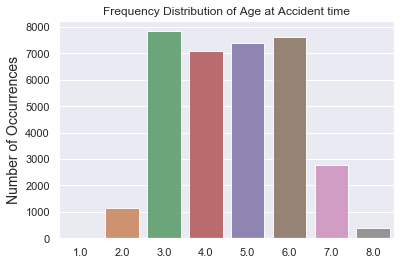

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df3.age_at_accident_date.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Age at Accident time')
plt.ylabel('Number of Occurrences', fontsize=14)
#plt.xlabel('Carrier', fontsize=14)
plt.show()

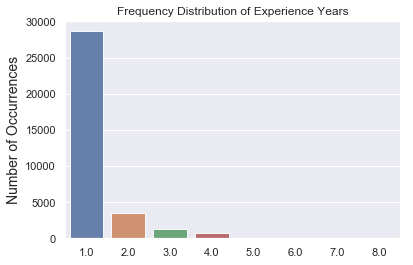

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df3.experience_years.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Experience Years')
plt.ylabel('Number of Occurrences', fontsize=14)
#plt.xlabel('Carrier', fontsize=14)
plt.show()

In [240]:
for col in df3.columns:
    print(col, df3[col].nunique())

market 26
sex 2
classcode 211
occupation 6879
experience_years 8
age_at_accident_date 8
case_of_injury_group 11


## Sampling of Data

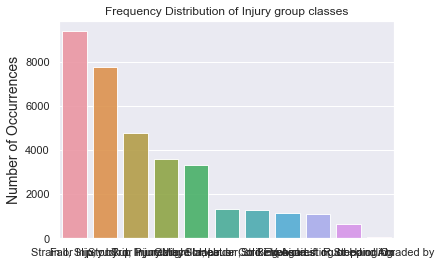

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df3.case_of_injury_group.value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Injury group classes')
plt.ylabel('Number of Occurrences', fontsize=14)
#plt.xlabel('Carrier', fontsize=14)
plt.show()

In [242]:
df3.case_of_injury_group.value_counts()

Strain or Injury by                9373
Fall, Slip, or Trip Injury         7742
Struck or Injured by               4759
Cut, Puncture, Scrape              3589
Miscellaneous                      3317
Caught In, Under, or Between       1324
Heat or Cold Exposures             1272
Vehicle                            1151
Striking Against or Stepping On    1087
Lifting or Handling                 643
Rubbed or Abraded by                 48
Name: case_of_injury_group, dtype: int64

In [243]:
searchfor = ['Rubbed or Abraded by', 'Lifting or Handling','Striking Against or Stepping On', 'Vehicle','Caught In, Under, or Between']
df3 = df3[~df3.case_of_injury_group.str.contains('|'.join(searchfor))]

In [244]:
df3['case_of_injury_group'].value_counts()

Strain or Injury by           9373
Fall, Slip, or Trip Injury    7742
Struck or Injured by          4759
Cut, Puncture, Scrape         3589
Miscellaneous                 3317
Heat or Cold Exposures        1272
Name: case_of_injury_group, dtype: int64

In [245]:
from sklearn.utils import resample

s1 = df3[df3.case_of_injury_group == 'Strain or Injury by']
s2 = df3[df3.case_of_injury_group == 'Fall, Slip, or Trip Injury']
s3 = df3[df3.case_of_injury_group == 'Struck or Injured by']
s4 = df3[df3.case_of_injury_group == 'Cut, Puncture, Scrape']
s5 = df3[df3.case_of_injury_group == 'Miscellaneous']
s6 = df3[df3.case_of_injury_group == 'Heat or Cold Exposures']

In [246]:
df_s6 = resample(s6, replace=True, n_samples = 5000, random_state=123)
df_s5 = resample(s5, replace=True, n_samples = 5000, random_state=123)
df_s4 = resample(s4, replace=True, n_samples = 5000, random_state=123)
df_s1 = resample(s1, replace=True, n_samples = 8000, random_state=123)

In [247]:
dfcat1 = pd.concat([df_s6, df_s5])
dfcat2 = pd.concat([dfcat1, df_s4])
dfcat3 = pd.concat([dfcat2, s3])
dfcat4 = pd.concat([dfcat3, s2])
dfcat5 = pd.concat([dfcat4, df_s1])
dfcat5.case_of_injury_group.value_counts()

Strain or Injury by           8000
Fall, Slip, or Trip Injury    7742
Heat or Cold Exposures        5000
Cut, Puncture, Scrape         5000
Miscellaneous                 5000
Struck or Injured by          4759
Name: case_of_injury_group, dtype: int64

In [248]:
text_label = ['Cut, Puncture, Scrape', 'Fall, Slip, or Trip Injury', 
                    'Heat or Cold Exposures', 'Miscellaneous', 'Strain or Injury by', 'Struck or Injured by'
        ]
text_label

['Cut, Puncture, Scrape',
 'Fall, Slip, or Trip Injury',
 'Heat or Cold Exposures',
 'Miscellaneous',
 'Strain or Injury by',
 'Struck or Injured by']

In [249]:
df3 = dfcat5

In [250]:
df3.case_of_injury_group.value_counts()

Strain or Injury by           8000
Fall, Slip, or Trip Injury    7742
Heat or Cold Exposures        5000
Cut, Puncture, Scrape         5000
Miscellaneous                 5000
Struck or Injured by          4759
Name: case_of_injury_group, dtype: int64

## Standardization and Normalization

In [251]:
# Standardization of features
df3["experience_years"] = (df3["experience_years"]-df3["experience_years"].min()) / (df3["experience_years"].max()-df3["experience_years"].min())
df3["age_at_accident_date"] = (df3["age_at_accident_date"]-df3["age_at_accident_date"].min()) / (df3["age_at_accident_date"].max()-df3["age_at_accident_date"].min())

In [252]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df3['market'] = LE.fit_transform(df3['market'])
df3['case_of_injury_group'] = LE.fit_transform(df3['case_of_injury_group'])
df3['occupation'] = LE.fit_transform(df3['occupation'].astype(str))
df3['sex'] = LE.fit_transform(df3['sex'])
df3['classcode'] = LE.fit_transform(df3['classcode'].astype(str))

In [253]:
# Standardization

df3["occupation"] = (df3["occupation"]-df3["occupation"].min()) / (df3["occupation"].max()-df3["occupation"].min())
df3["classcode"] = (df3["classcode"]-df3["classcode"].min()) / (df3["classcode"].max()-df3["classcode"].min())
df3["market"] = (df3["market"]-df3["market"].min()) / (df3["market"].max()-df3["market"].min())
df3["sex"] = (df3["sex"]-df3["sex"].min()) / (df3["sex"].max()-df3["sex"].min())

In [254]:
df3.head()

,market,sex,classcode,occupation,experience_years,age_at_accident_date,case_of_injury_group
31886,0.52,1.0,0.814634,0.604321,0.0,0.714286,2
29934,0.00,1.0,0.814634,0.461226,0.0,0.714286,2
3045,0.20,1.0,0.224390,0.453840,0.0,0.285714,2
32544,0.52,1.0,0.829268,0.511632,0.0,0.571429,2
35157,0.52,1.0,0.882927,0.790066,0.0,0.285714,2


In [255]:
# Feature Correlation
df3.corr(method ='pearson')

,market,sex,classcode,occupation,experience_years,age_at_accident_date,case_of_injury_group
market,1.000000,-0.052040,0.165288,0.021965,0.021883,0.021319,-0.037093
sex,-0.052040,1.000000,-0.007817,0.107760,0.063619,0.020210,0.010346
classcode,0.165288,-0.007817,1.000000,0.006544,0.034276,0.046565,0.006490
occupation,0.021965,0.107760,0.006544,1.000000,0.028610,0.006905,0.022501
experience_years,0.021883,0.063619,0.034276,0.028610,1.000000,0.342580,-0.004189
age_at_accident_date,0.021319,0.020210,0.046565,0.006905,0.342580,1.000000,0.003826
case_of_injury_group,-0.037093,0.010346,0.006490,0.022501,-0.004189,0.003826,1.000000


## Data Separation

In [256]:
df4 =df3

In [257]:
labels = df4[['case_of_injury_group']]

In [258]:
features = df4.drop('case_of_injury_group', axis=1)

In [259]:
features.head()

,market,sex,classcode,occupation,experience_years,age_at_accident_date
31886,0.52,1.0,0.814634,0.604321,0.0,0.714286
29934,0.00,1.0,0.814634,0.461226,0.0,0.714286
3045,0.20,1.0,0.224390,0.453840,0.0,0.285714
32544,0.52,1.0,0.829268,0.511632,0.0,0.571429
35157,0.52,1.0,0.882927,0.790066,0.0,0.285714


In [260]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(features, labels)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features_1 = fit.transform(features)
# Summarize selected features
print(features_1[0:10,:])

[12.355 29.059 33.61  12.616 32.894 89.388]
[[1.    0.815 0.    0.714]
 [1.    0.815 0.    0.714]
 [1.    0.224 0.    0.286]
 [1.    0.829 0.    0.571]
 [1.    0.883 0.    0.286]
 [1.    0.224 0.    0.571]
 [0.    0.224 0.    0.571]
 [1.    0.376 0.    0.714]
 [1.    0.829 0.    0.571]
 [0.    0.224 0.    0.571]]


In [261]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('Number of train and test data:')
print(number_of_train, number_of_test)

Number of train and test data:
28400 7101


In [262]:
"""
from imblearn.over_sampling import SMOTE
sm = SMOTE('minority')
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)
print(x_train_res.shape, y_train_res.shape)
"""

"\nfrom imblearn.over_sampling import SMOTE\nsm = SMOTE('minority')\nx_train_res, y_train_res = sm.fit_sample(X_train, Y_train)\nprint(x_train_res.shape, y_train_res.shape)\n"

In [263]:
from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(Y_train)
test_y_2 = to_categorical(Y_test)

#vcheck that target column has been converted
train_y_2[0:5]

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [264]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))

model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))



model.add(Dense(6, activation='softmax'))


In [265]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [274]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=10)

#train model
history = model.fit(X_train, train_y_2, epochs=20, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 22720 samples, validate on 5680 samples
Epoch 1/20
22720/22720 [==============================] - 3s 128us/step - loss: 1.6790 - acc: 0.2952 - val_loss: 1.7114 - val_acc: 0.2704
Epoch 2/20
22720/22720 [==============================] - 3s 120us/step - loss: 1.6740 - acc: 0.2953 - val_loss: 1.7023 - val_acc: 0.2801
Epoch 3/20
22720/22720 [==============================] - 3s 120us/step - loss: 1.6677 - acc: 0.2994 - val_loss: 1.6983 - val_acc: 0.2796
Epoch 4/20
22720/22720 [==============================] - 3s 122us/step - loss: 1.6601 - acc: 0.3014 - val_loss: 1.6968 - val_acc: 0.2838
Epoch 5/20
22720/22720 [==============================] - 3s 120us/step - loss: 1.6535 - acc: 0.3071 - val_loss: 1.6951 - val_acc: 0.2805
Epoch 6/20
22720/22720 [==============================] - 3s 124us/step - loss: 1.6466 - acc: 0.3066 - val_loss: 1.6942 - val_acc: 0.2873
Epoch 7/20
22720/22720 [==============================] - 3s 121us/step - loss: 1.6397 - acc: 0.3146 - val_loss: 1.6818 - v

Training Accuracy: 0.291, Test Accuracy: 0.279


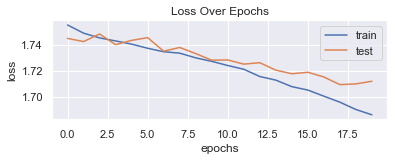

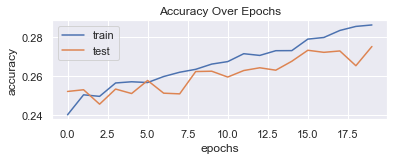

In [267]:
# Evaluate Model

_, train_acc = model.evaluate(X_train, train_y_2, verbose = 0)
_, test_acc = model.evaluate(X_test, test_y_2, verbose = 0)
print('Training Accuracy: %.3f, Test Accuracy: %.3f' %(train_acc, test_acc))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss Over Epochs')
pyplot.xlabel('epochs')
pyplot.ylabel('loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy Over Epochs')
pyplot.xlabel('epochs')
pyplot.ylabel('accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [268]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 200)               1400      
_________________________________________________________________
dense_27 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_28 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 1206      
Total para

In [269]:
y_score = model.predict(X_test)

In [270]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y_2.argmax(axis=1), y_score.argmax(axis=1))
print(cnf_matrix)

[[228 251 123  29 289  66]
 [139 726 111  21 452  70]
 [ 91 320 245  23 288  38]
 [130 292 107  42 383  55]
 [145 627 102  21 641 104]
 [123 281  83  19 334 102]]


In [271]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

Normalized confusion matrix


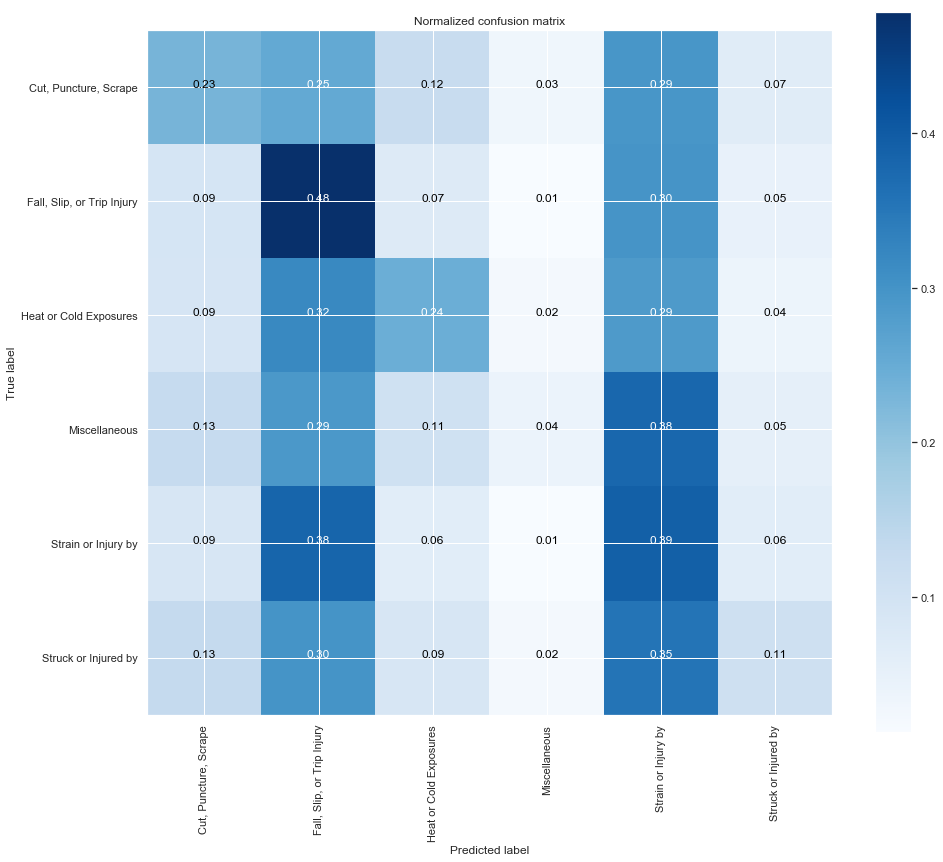

In [272]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools  
    import matplotlib.pyplot as plt
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#y_pred = model.predict(x_test);
#cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(text_label), normalize=True,
                      title='Normalized confusion matrix')

#fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)


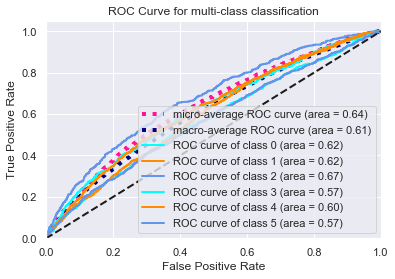

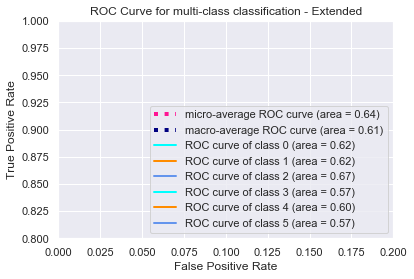

In [273]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 6

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class classification - Extended')
plt.legend(loc="lower right")
plt.show()